In [1]:
import json
import numpy as np
import requests

In [2]:
ids = {
    '49936078': {'host': 'us-east-1.ec2.cloudharmony.net', 'type': 'wifi'},
    '49936077': {'host': 'asia-east.azure.cloudharmony.net', 'type': 'wifi'},
    '49936076': {'host': 'asia-east2.gce.cloudharmony.net', 'type': 'wifi'},
    '49936075': {'host': 'ap-east-1.ec2.cloudharmony.net', 'type': 'wifi'},
    '49936074': {'host': 'uk-south.azure.cloudharmony.net', 'type': 'wifi'},
    '49936073': {'host': 'europe-west2.gce.cloudharmony.net', 'type': 'wifi'},
    '49936072': {'host': 'eu-west-2.ec2.cloudharmony.net', 'type': 'wifi'},
    '49936071': {'host': 'brazil-south.azure.cloudharmony.net', 'type': 'wifi'},
    '49936070': {'host': 'us-east.azure.cloudharmony.net', 'type': 'wifi'},
    '49936069': {'host': 'us-east4.gce.cloudharmony.net', 'type': 'wifi'},
    '49936068': {'host': 'australia-east.azure.cloudharmony.net', 'type': 'wifi'},
    '49936004': {'host': 'us-east-1.ec2.cloudharmony.net', 'type': 'lan'},
    '49936003': {'host': 'asia-east.azure.cloudharmony.net', 'type': 'lan'},
    '49936002': {'host': 'asia-east2.gce.cloudharmony.net', 'type': 'lan'},
    '49936001': {'host': 'ap-east-1.ec2.cloudharmony.net', 'type': 'lan'},
    '49936000': {'host': 'uk-south.azure.cloudharmony.net', 'type': 'lan'},
    '49935999': {'host': 'europe-west2.gce.cloudharmony.net', 'type': 'lan'},
    '49935998': {'host': 'eu-west-2.ec2.cloudharmony.net', 'type': 'lan'},
    '49935997': {'host': 'brazil-south.azure.cloudharmony.net', 'type': 'lan'},
    '49935996': {'host': 'australia-east.azure.cloudharmony.net', 'type': 'lan'},
    '49935995': {'host': 'us-east.azure.cloudharmony.net', 'type': 'lan'},
    '49935994': {'host': 'us-east4.gce.cloudharmony.net', 'type': 'lan'},
    '49936174': {'host': 'us-east-1.ec2.cloudharmony.net', 'type': 'cellular'},
    '49936173': {'host': 'asia-east.azure.cloudharmony.net', 'type': 'cellular'},
    '49936172': {'host': 'asia-east2.gce.cloudharmony.net', 'type': 'cellular'},
    '49936171': {'host': 'ap-east-1.ec2.cloudharmony.net', 'type': 'cellular'},
    '49936170': {'host': 'uk-south.azure.cloudharmony.net', 'type': 'cellular'},
    '49936169': {'host': 'europe-west2.gce.cloudharmony.net', 'type': 'cellular'},
    '49936168': {'host': 'eu-west-2.ec2.cloudharmony.net', 'type': 'cellular'},
    '49936167': {'host': 'brazil-south.azure.cloudharmony.net', 'type': 'cellular'},
    '49936166': {'host': 'us-east.azure.cloudharmony.net', 'type': 'cellular'},
    '49936165': {'host': 'us-east4.gce.cloudharmony.net', 'type': 'cellular'},
    '49936164': {'host': 'australia-east.azure.cloudharmony.net', 'type': 'cellular'},
    '49936331': {'host': 'asia-east.azure.cloudharmony.net', 'type': 'satellite'},
    '49936330': {'host': 'asia-east2.gce.cloudharmony.net', 'type': 'satellite'},
    '49936329': {'host': 'ap-east-1.ec2.cloudharmony.net', 'type': 'satellite'},
    '49936328': {'host': 'uk-south.azure.cloudharmony.net', 'type': 'satellite'},
    '49936327': {'host': 'europe-west2.gce.cloudharmony.net', 'type': 'satellite'},
    '49936326': {'host': 'eu-west-2.ec2.cloudharmony.net', 'type': 'satellite'},
    '49936325': {'host': 'brazil-south.azure.cloudharmony.net', 'type': 'satellite'},
    '49936324': {'host': 'us-east.azure.cloudharmony.net', 'type': 'satellite'},
    '49936323': {'host': 'us-east4.gce.cloudharmony.net', 'type': 'satellite'},
    '49936322': {'host': 'australia-east.azure.cloudharmony.net', 'type': 'satellite'},
    '49936321': {'host': 'us-east-1.ec2.cloudharmony.net', 'type': 'satellite'},
}

In [3]:
data_centers = {
    'australia-east.azure.cloudharmony.net': ('Microsoft', 'OC', 'AU', 'Sydney', -33.8591, 151.2002),
    'brazil-south.azure.cloudharmony.net': ('Microsoft', 'SA', 'BR', 'Campinas', -22.9035, -47.0565),
    'eu-west-2.ec2.cloudharmony.net': ('Amazon EC2', 'EU', 'GB', 'London', 51.5164, -0.093),
    'europe-west2.gce.cloudharmony.net': ('Google', 'EU', 'GB', None, 51.5164, -0.093),
    'uk-south.azure.cloudharmony.net': ('Microsoft', 'EU', 'GB', 'London', 51.5164, -0.093),
    'ap-east-1.ec2.cloudharmony.net': ('Amazon EC2', 'AS', 'HK', 'Hong Kong', 22.25, 114.1667),
    'asia-east2.gce.cloudharmony.net': ('Google', 'AS', 'HK', 'Central', 22.2795, 114.146),
    'asia-east.azure.cloudharmony.net': ('Microsoft', 'AS', 'HK', 'Central', 22.2795, 114.146),
    'us-east-1.ec2.cloudharmony.net': ('Amazon EC2', 'NA', 'US', 'Ashburn', 39.0481, -77.4728),
    'us-east4.gce.cloudharmony.net': ('Google', 'NA', 'US', 'Washington', 38.8939, -77.0365),
    'us-east.azure.cloudharmony.net': ('Microsoft', 'NA', 'US', 'Washington', 38.7095, -78.1539),
}

def get_continent(id_list):
    continents = {}
    for id in id_list:
        continent = data_centers[ids[id]['host']][1]
        continents[id] = continent
    return continents

In [4]:
cellular_ids =  [key for key, value in ids.items() if value['type'] == 'cellular']
wifi_ids = [key for key, value in ids.items() if value['type'] == 'wifi']
lan_ids = [key for key, value in ids.items() if value['type'] == 'lan']
satellite_ids = [key for key, value in ids.items() if value['type'] == 'satellite']

cellular_continents = get_continent(cellular_ids)
wifi_continents = get_continent(wifi_ids)
lan_continents = get_continent(lan_ids)
satellite_continents = get_continent(satellite_ids)

print('Cellular continents:', cellular_continents)
print('WiFi continents:', wifi_continents)
print('LAN continents:', lan_continents)
print('Satellite continents:', satellite_continents)

Cellular continents: {'49936174': 'NA', '49936173': 'AS', '49936172': 'AS', '49936171': 'AS', '49936170': 'EU', '49936169': 'EU', '49936168': 'EU', '49936167': 'SA', '49936166': 'NA', '49936165': 'NA', '49936164': 'OC'}
WiFi continents: {'49936078': 'NA', '49936077': 'AS', '49936076': 'AS', '49936075': 'AS', '49936074': 'EU', '49936073': 'EU', '49936072': 'EU', '49936071': 'SA', '49936070': 'NA', '49936069': 'NA', '49936068': 'OC'}
LAN continents: {'49936004': 'NA', '49936003': 'AS', '49936002': 'AS', '49936001': 'AS', '49936000': 'EU', '49935999': 'EU', '49935998': 'EU', '49935997': 'SA', '49935996': 'OC', '49935995': 'NA', '49935994': 'NA'}
Satellite continents: {'49936331': 'AS', '49936330': 'AS', '49936329': 'AS', '49936328': 'EU', '49936327': 'EU', '49936326': 'EU', '49936325': 'SA', '49936324': 'NA', '49936323': 'NA', '49936322': 'OC', '49936321': 'NA'}


In [5]:
def request_data(measurement_id):
    # The URL to reach the measurement
    url = f"https://atlas.ripe.net/api/v2/measurements/{measurement_id}/results/?start=1676221335&stop=1676825715&format=json"

    # Make a request to the RIPE Atlas API to get the measurement results
    response = requests.get(url)
    data = json.loads(response.content)
    return data

In [6]:
import statistics

def get_mean_latency(data):
    latency_arr = []
    for probe in data:        
        # Append the latenty data for each probe
        latency_arr += [result["rtt"] for result in probe["result"] if 'rtt' in result]
        
    # Calculate the mean of latencies
    mean_latency = sum(latency_arr) / len(latency_arr)  
    return mean_latency

def get_stability(latencies):
    return statistics.stdev(latencies)

# Calculate the mean for each type each continent
cellular_latencies, wifi_latencies, lan_latencies, satellite_latencies = {}, {}, {}, {}
cellular_stability, wifi_stability, lan_stability, satellite_stability = {}, {}, {}, {}
continents = {
    "Cellular": cellular_continents,
    "Wifi": wifi_continents,
    "LAN": lan_continents,
    "Satellite": satellite_continents
}
latencies = {
    "Cellular": cellular_latencies,
    "Wifi": wifi_latencies,
    "LAN": lan_latencies,
    "Satellite": satellite_latencies
}
stabilities = {
    "Cellular": cellular_stability,
    "Wifi": wifi_stability,
    "LAN": lan_stability,
    "Satellite": satellite_stability
}

for connection_type, measurements in continents.items():
    for measurement_id, continent in measurements.items():
        data = request_data(measurement_id)
        mean_latency = get_mean_latency(data)
        latencies[connection_type][continent] = mean_latency
        stdev = get_stability([result["rtt"] for probe in data for result in probe["result"] if 'rtt' in result])
        stabilities[connection_type][continent] = stdev
    print(f"{connection_type} stabilities:", stabilities[connection_type])
    print(f"{connection_type} latencies:", latencies[connection_type])

Cellular stabilities: {'NA': 80.15144336326989, 'AS': 82.35745575461114, 'EU': 82.1658986219089, 'SA': 83.9496906134703, 'OC': 87.87616072024116}
Cellular latencies: {'NA': 146.6845173012343, 'AS': 261.80556320454366, 'EU': 86.89092509832506, 'SA': 257.4592628969448, 'OC': 273.70205790518054}
Wifi stabilities: {'NA': 38.6696215247479, 'AS': 52.97499549023679, 'EU': 56.42704873924294, 'SA': 51.83655163986499, 'OC': 54.01519754520796}
Wifi latencies: {'NA': 112.80563512584571, 'AS': 232.86694114079137, 'EU': 62.32637133236708, 'SA': 214.63573402129745, 'OC': 249.5038697545729}
LAN stabilities: {'NA': 67.68426646853241, 'AS': 68.85468645463172, 'EU': 87.12135446199532, 'SA': 84.9307186385568, 'OC': 91.36343935366635}
LAN latencies: {'NA': 125.48455023576261, 'AS': 235.0642049998081, 'EU': 69.89554584794169, 'SA': 228.80311858665044, 'OC': 226.84636219271434}
Satellite stabilities: {'AS': 57.26231508398956, 'EU': 88.70927954961573, 'SA': 73.99741902792078, 'NA': 81.48422345409311, 'OC': 53

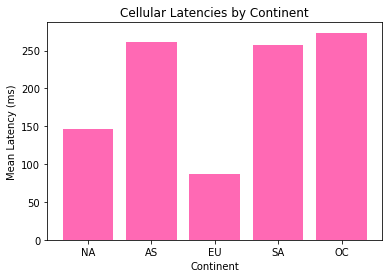

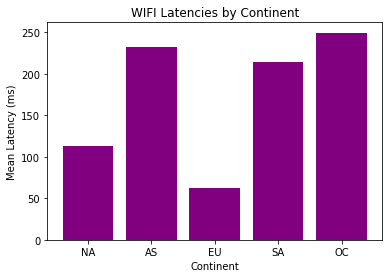

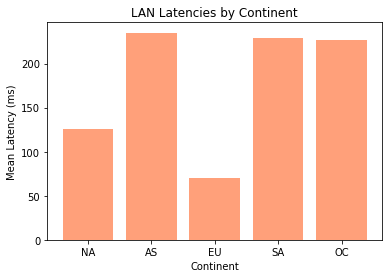

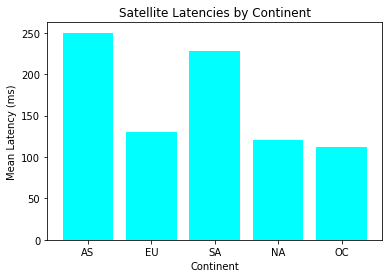

In [7]:
import matplotlib.pyplot as plt

def create_bar_chart_by_continent(latency_dict, latency_type, color_code):
    plt.bar(latency_dict.keys(), latency_dict.values(), color= color_code)
    plt.title(f"{latency_type} Latencies by Continent")
    plt.xlabel("Continent")
    plt.ylabel("Mean Latency (ms)")
    plt.show()

create_bar_chart_by_continent(cellular_latencies, 'Cellular', 'hotpink')
create_bar_chart_by_continent(wifi_latencies, 'WIFI', 'purple')
create_bar_chart_by_continent(lan_latencies, 'LAN', 'lightsalmon' )
create_bar_chart_by_continent(satellite_latencies, 'Satellite', 'cyan')

In [8]:
def plot_latencies_by_continent(cellular, wifi, lan, satellite):
    for continent in cellular.keys():
        fig, ax = plt.subplots()
        ax.set_title(f"Latencies by Technology in {continent}")
        bar_colors = ['hotpink', 'purple', 'lightsalmon', 'cyan']
        ax.bar(['Cellular', 'WiFi', 'LAN', 'Satellite'], [cellular[continent], wifi[continent], lan[continent], satellite[continent]], color=bar_colors)
        ax.set_ylabel("Latency (ms)")
        plt.show()

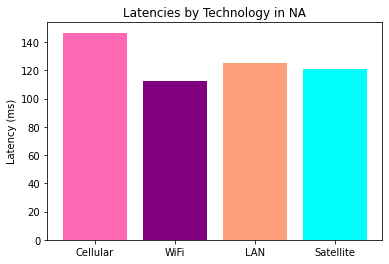

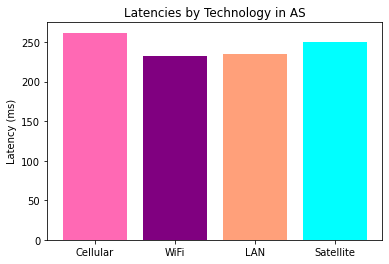

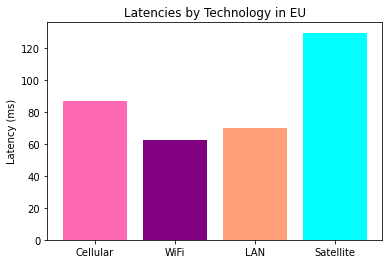

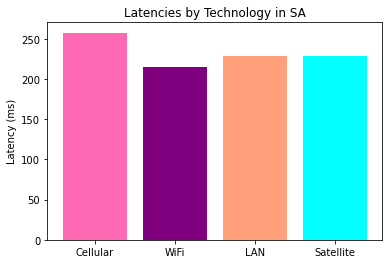

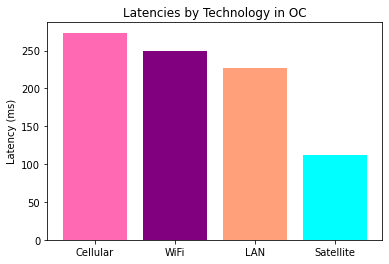

In [9]:
plot_latencies_by_continent(cellular_latencies, wifi_latencies, lan_latencies, satellite_latencies)

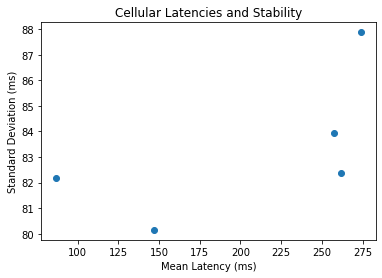

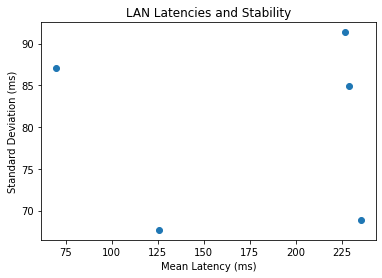

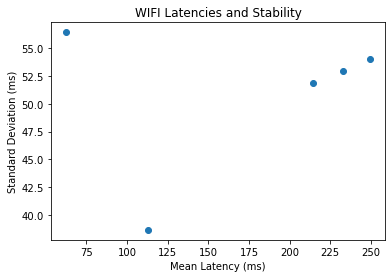

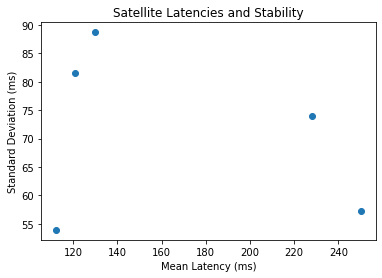

In [10]:
def create_scatter_chart_by_continent(latency_dict,stability_dict, latency_type):
    plt.scatter(latency_dict.values(), stability_dict.values())
    plt.title(f"{latency_type} Latencies and Stability")
    plt.xlabel("Mean Latency (ms)")
    plt.ylabel("Standard Deviation (ms)")
    plt.show()
    
create_scatter_chart_by_continent(cellular_latencies, cellular_stability, 'Cellular')
create_scatter_chart_by_continent(lan_latencies,lan_stability, 'LAN')
create_scatter_chart_by_continent(wifi_latencies,wifi_stability, 'WIFI')
create_scatter_chart_by_continent(satellite_latencies,satellite_stability, 'Satellite')


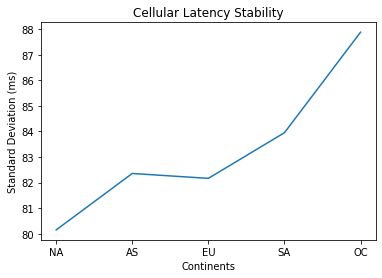

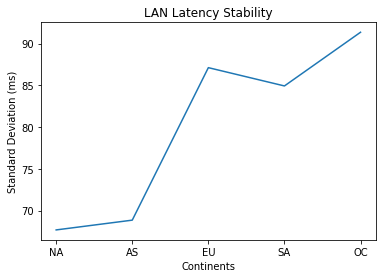

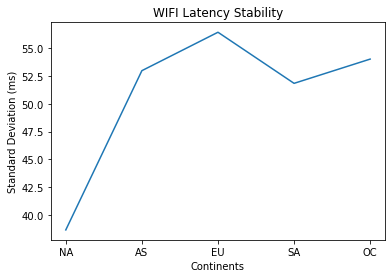

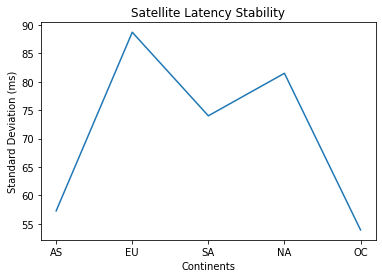

In [11]:
def create_line_chart_by_stability(stability_dict, latency_type):
    plt.plot(stability_dict.keys(), stability_dict.values())
    plt.title(f"{latency_type} Latency Stability")
    plt.xlabel("Continents")
    plt.ylabel("Standard Deviation (ms)")
    plt.show()
    
create_line_chart_by_stability(cellular_stability, 'Cellular')
create_line_chart_by_stability(lan_stability, 'LAN')
create_line_chart_by_stability(wifi_stability, 'WIFI')
create_line_chart_by_stability(satellite_stability, 'Satellite')


findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


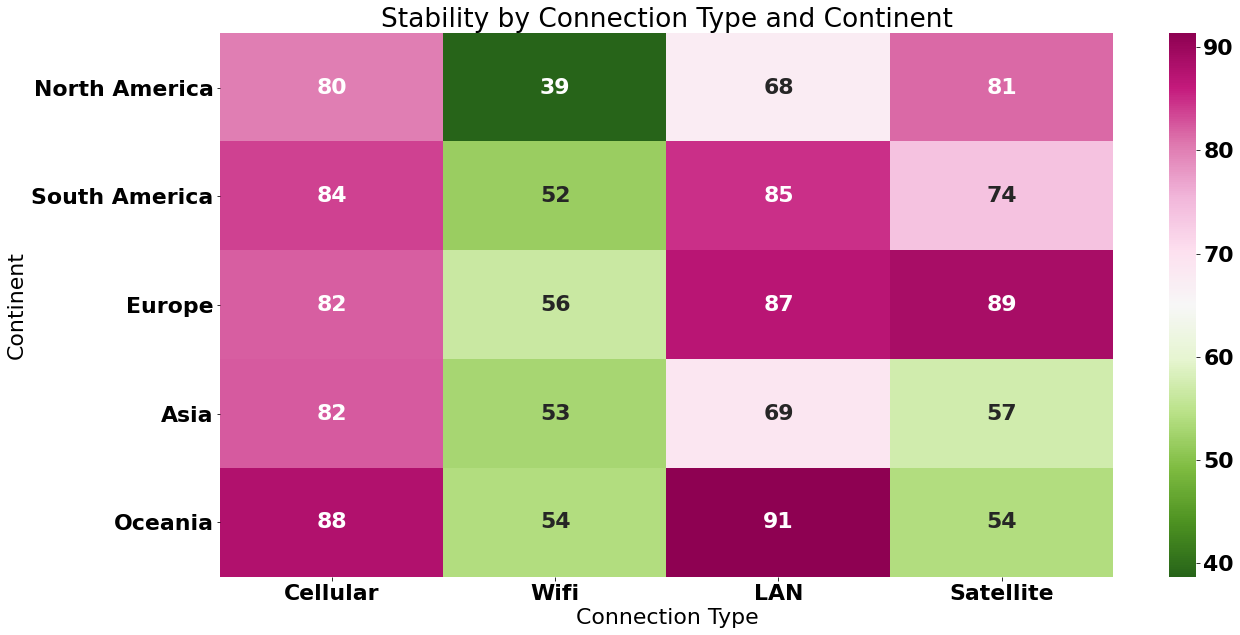

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (20,10)
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 22}

plt.rc('font', **font)

# Prepare data as a matrix
latency_data = [
    [cellular_stability['NA'], wifi_stability['NA'], lan_stability['NA'], satellite_stability['NA']],
    [cellular_stability['SA'], wifi_stability['SA'], lan_stability['SA'], satellite_stability['SA']],
    [cellular_stability['EU'], wifi_stability['EU'], lan_stability['EU'], satellite_stability['EU']],
    [cellular_stability['AS'], wifi_stability['AS'], lan_stability['AS'], satellite_stability['AS']],
    [cellular_stability['OC'], wifi_stability['OC'], lan_stability['OC'], satellite_stability['OC']]
]

connection_types = ['Cellular', 'Wifi', 'LAN', 'Satellite']
continents = ['North America', 'South America', 'Europe', 'Asia', 'Oceania']

sns.heatmap(latency_data, annot=True, cmap='PiYG_r', xticklabels=connection_types, yticklabels=continents)

plt.title('Stability by Connection Type and Continent')
plt.xlabel('Connection Type')
plt.ylabel('Continent')

# Show the plot
plt.show()


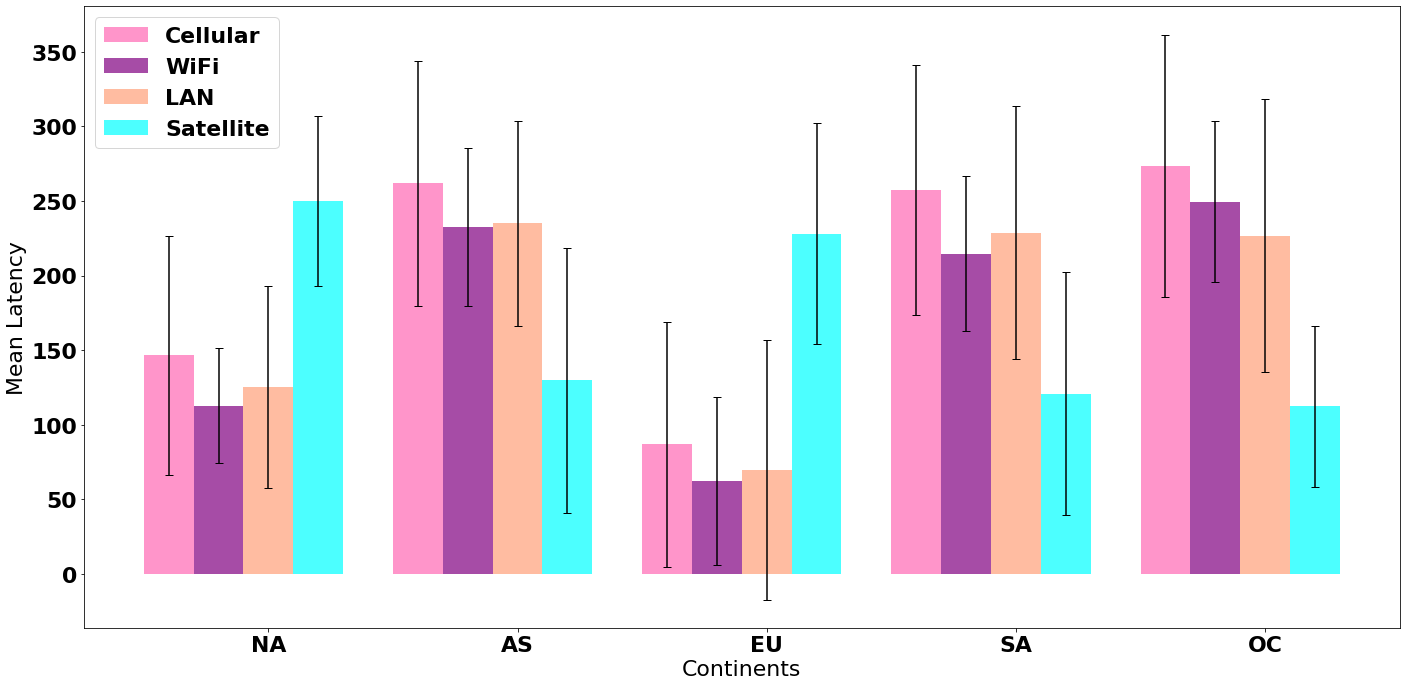

In [13]:
plt.rcParams["figure.figsize"] = (20,10)
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 22}

plt.rc('font', **font)
fig, ax = plt.subplots()
bar_width = 0.2
opacity = 0.7
index = np.arange(len(cellular_latencies))

cellular_bar = ax.bar(index, cellular_latencies.values(), bar_width, alpha=opacity, color='hotpink', label='Cellular')
wifi_bar = ax.bar(index + bar_width, wifi_latencies.values(), bar_width, alpha=opacity, color='purple', label='WiFi')
lan_bar = ax.bar(index + 2 * bar_width, lan_latencies.values(), bar_width, alpha=opacity, color='lightsalmon', label='LAN')
satellite_bar = ax.bar(index + 3 * bar_width, satellite_latencies.values(), bar_width, alpha=opacity, color='cyan', label='Satellite')

ax.set_xlabel('Continents')
ax.set_ylabel('Mean Latency')
ax.set_xticks(index + 2 * bar_width)
ax.set_xticklabels(cellular_latencies.keys())
ax.legend()

# Add error bars to the bar chart
ax.errorbar(index, cellular_latencies.values(), yerr=list(cellular_stability.values()), fmt='none', ecolor='k', capsize=4, capthick=1)
ax.errorbar(index + bar_width, wifi_latencies.values(), yerr=list(wifi_stability.values()), fmt='none', ecolor='k', capsize=4, capthick=1)
ax.errorbar(index + 2 * bar_width, lan_latencies.values(), yerr=list(lan_stability.values()), fmt='none', ecolor='k', capsize=4, capthick=1)
ax.errorbar(index + 3 * bar_width, satellite_latencies.values(), yerr=list(satellite_stability.values()), fmt='none', ecolor='k', capsize=4, capthick=1)

plt.tight_layout()
plt.show()


In [49]:
import datetime

def request_data_time_segmented(measurement_id):
    
    segmented_data = {
        "morning": [],
        "lunch": [],
        "afternoon": [],
        "evening": [],
        "night": []
        }
    data = request_data(measurement_id)
    for probe in data:
        timestamp = datetime.datetime.fromtimestamp(probe["timestamp"])
        time = timestamp.time()

        if datetime.time(6) <= time < datetime.time(12):
            segmented_data["morning"].append(probe)
        elif datetime.time(12) <= time < datetime.time(14):
            segmented_data["lunch"].append(probe)
        elif datetime.time(14) <= time < datetime.time(18):
            segmented_data["afternoon"].append(probe)
        elif datetime.time(18) <= time <= datetime.time(23):
            segmented_data["evening"].append(probe)
        else:
            segmented_data["night"].append(probe)
    mean_latencies = {}
    # Calculate mean latency for each time segment
    for segment, data_segment in segmented_data.items():
        mean_latencies[segment] = get_mean_latency(data_segment)
    return mean_latencies

In [102]:
connections = {
    'cellular': cellular_continents,
    'wifi': wifi_continents,
    'lan': lan_continents,
    'satellite': satellite_continents,
}
timed_data = {
    'cellular': {},
    'wifi': {},
    'lan': {},
    'satellite': {},
}
for conn_type, continent_dict in connections.items():
    for measurement_id, continent in continent_dict.items():
        segmented_data = request_data_time_segmented(measurement_id)
        
        if continent not in timed_data[conn_type]:
            timed_data[conn_type][continent] = []
        timed_data[conn_type][continent].append(segmented_data)

for conn_type in timed_data:
    print(f'{conn_type} data latency means by time segments: {timed_data[conn_type]}')


cellular data latency means by time segments: {'NA': [{'morning': 151.3941598720723, 'lunch': 152.34166260557058, 'afternoon': 153.0212060882706, 'evening': 156.14380839073903, 'night': 151.02920927165286}, {'morning': 147.3668943824368, 'lunch': 148.5804472408935, 'afternoon': 146.88404046809623, 'evening': 149.62865217622016, 'night': 147.1138081109036}, {'morning': 144.50679311996686, 'lunch': 145.41802225490216, 'afternoon': 146.80706351790795, 'evening': 150.09099673557967, 'night': 147.0474417731827}], 'AS': [{'morning': 226.13592441764877, 'lunch': 228.29930782354933, 'afternoon': 228.15445208546882, 'evening': 233.45909088892614, 'night': 225.67813291536402}, {'morning': 267.83871558376757, 'lunch': 269.8061459104531, 'afternoon': 269.5904906208253, 'evening': 272.7127204669492, 'night': 267.90423644195073}, {'morning': 259.7705011943356, 'lunch': 261.77246439168135, 'afternoon': 265.4834575987102, 'evening': 265.4788224182256, 'night': 259.8143058231701}], 'EU': [{'morning': 8

In [104]:
def restructure_latency_data(cellular_timed_data, wifi_timed_data, lan_timed_data, satellite_timed_data ):
    data = {}
    for region in cellular_timed_data:
        data[region] = {}
        data[region]['cellular'] = {
            'morning': cellular_timed_data[region]['morning'],
            'lunch': cellular_timed_data[region]['lunch'],
            'afternoon': cellular_timed_data[region]['afternoon'],
            'evening': cellular_timed_data[region]['evening'],
            'night': cellular_timed_data[region]['night'],
        }
        data[region]['wifi'] = {
            'morning': wifi_timed_data[region]['morning'],
            'lunch': wifi_timed_data[region]['lunch'],
            'afternoon': wifi_timed_data[region]['afternoon'],
            'evening': wifi_timed_data[region]['evening'],
            'night': wifi_timed_data[region]['night'],
        }
        data[region]['lan'] = {
            'morning': lan_timed_data[region]['morning'],
            'lunch': lan_timed_data[region]['lunch'],
            'afternoon': lan_timed_data[region]['afternoon'],
            'evening': lan_timed_data[region]['evening'],
            'night': lan_timed_data[region]['night'],
        }
        data[region]['satellite'] = {
            'morning': satellite_timed_data[region]['morning'],
            'lunch': satellite_timed_data[region]['lunch'],
            'afternoon': satellite_timed_data[region]['afternoon'],
            'evening': satellite_timed_data[region]['evening'],
            'night': satellite_timed_data[region]['night']
        }
    return data


In [105]:
restructured_data = restructure_latency_data(timed_data['cellular'], timed_data['wifi'], timed_data['lan'], timed_data['satellite'])

TypeError: list indices must be integers or slices, not str

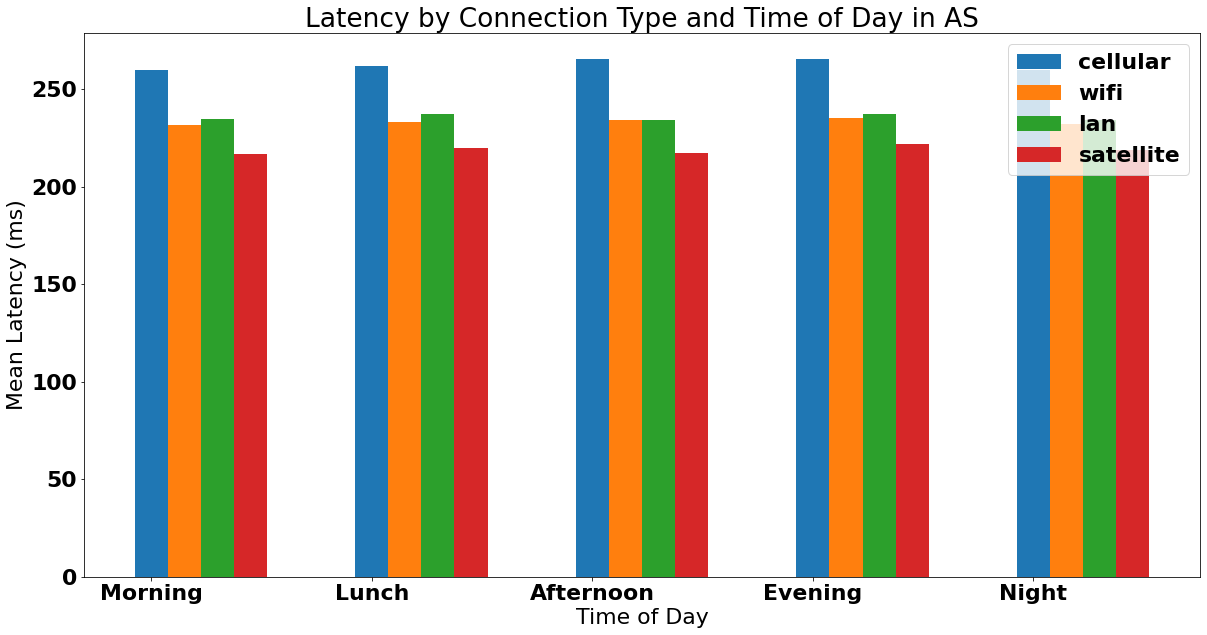

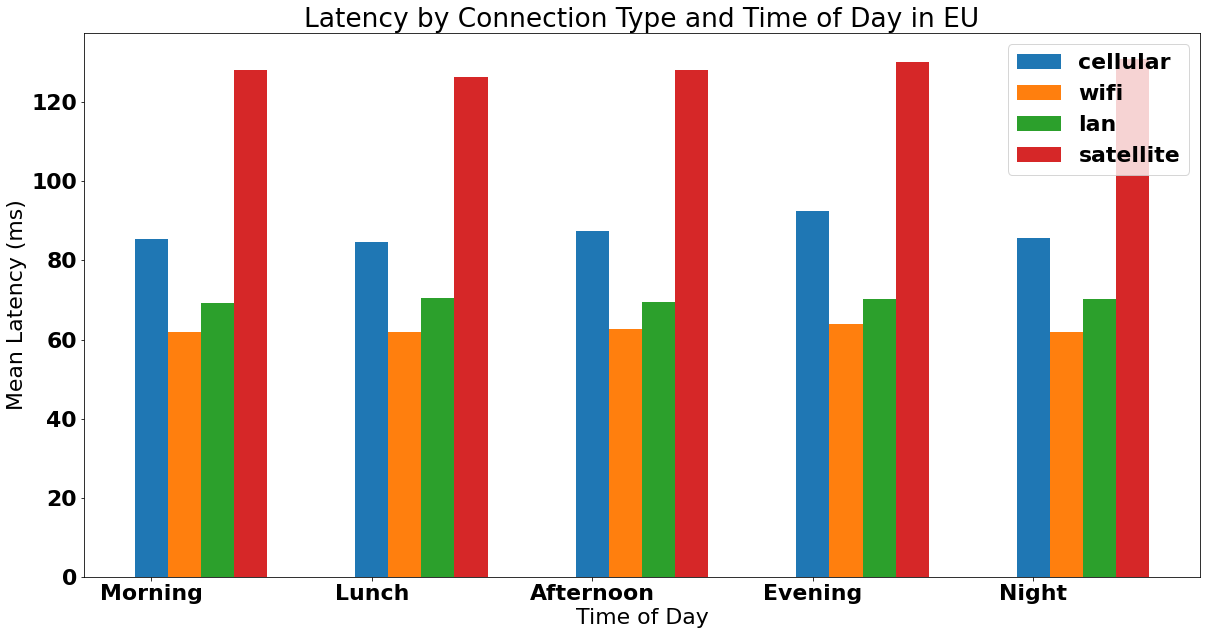

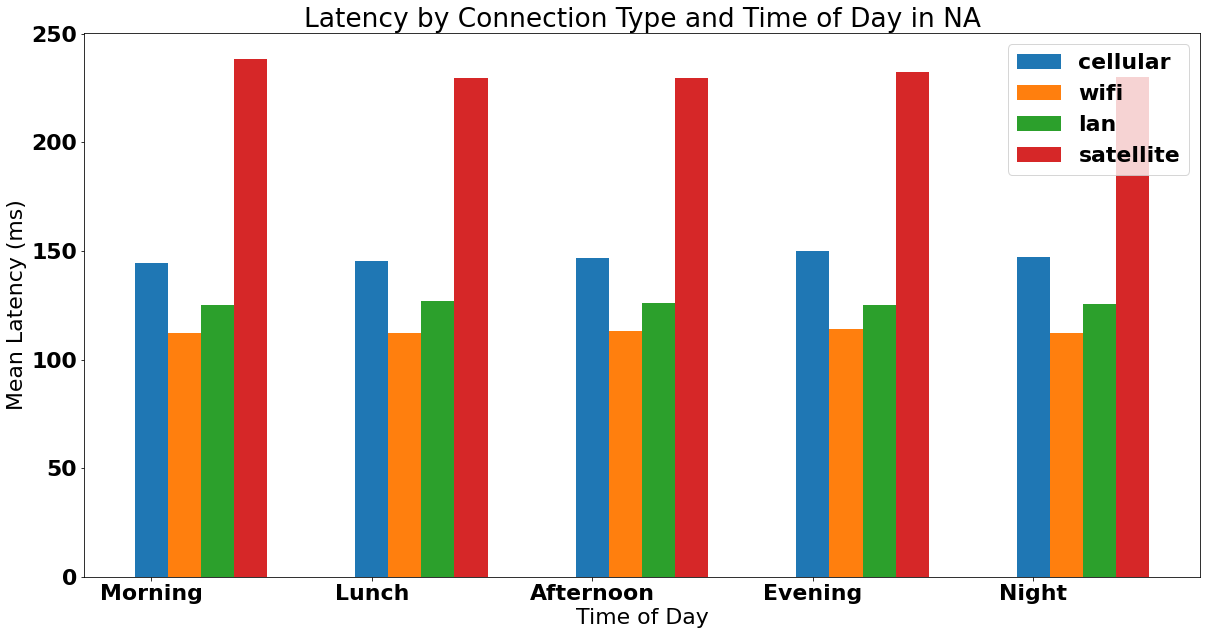

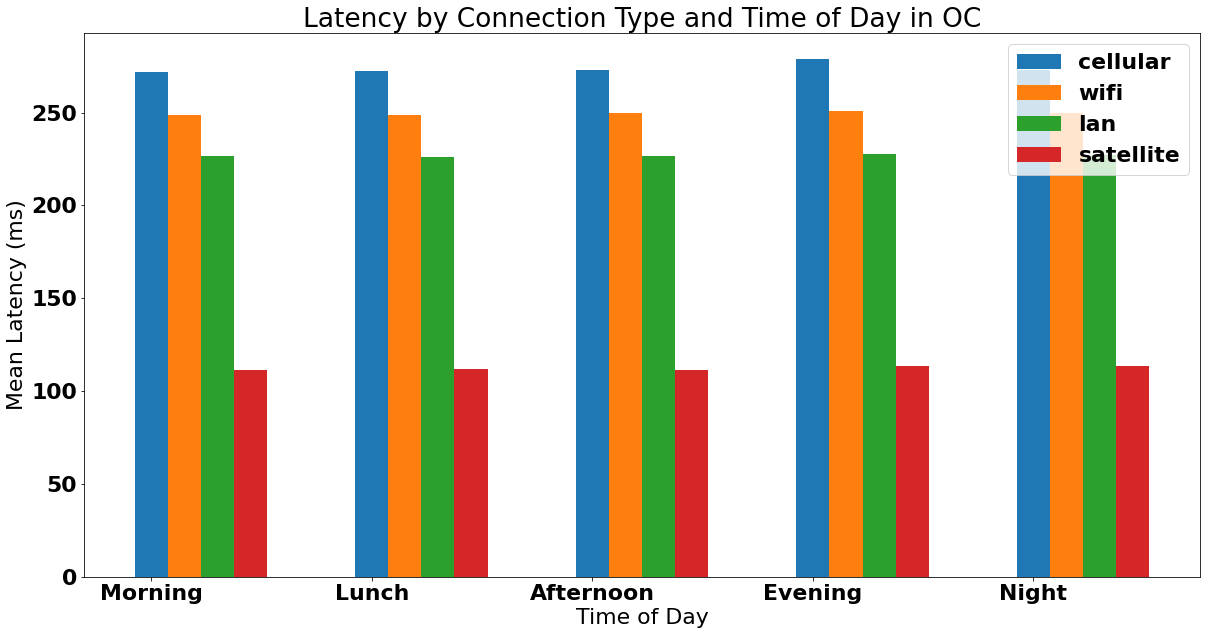

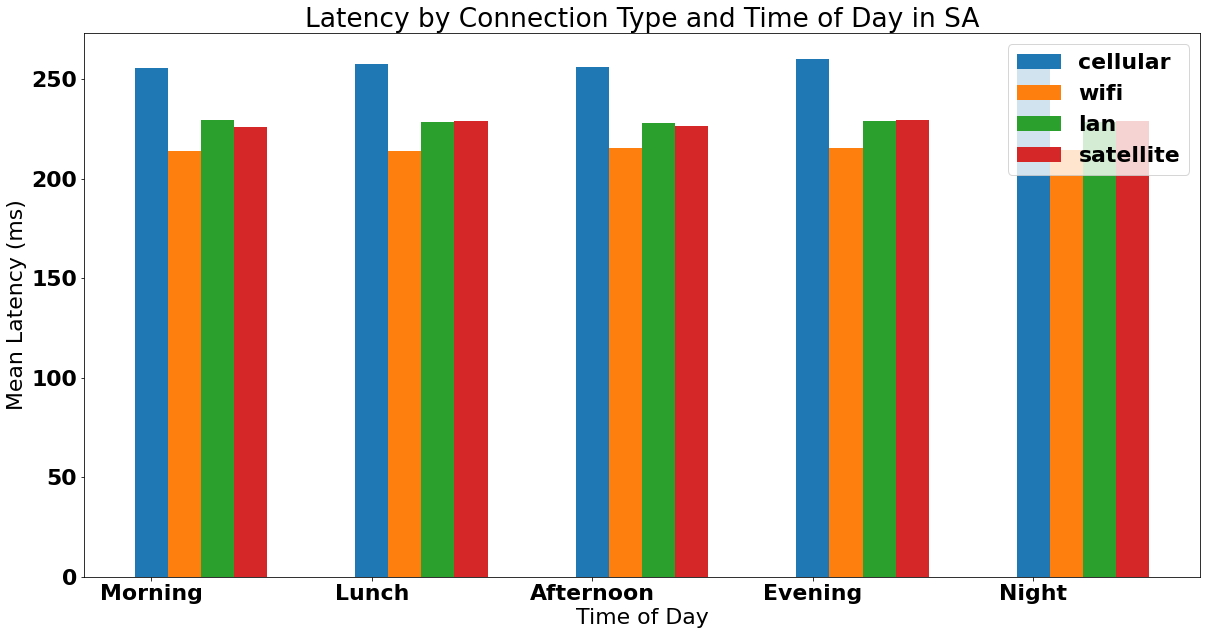

In [101]:
def create_plot_time(continent):
    networks = ['cellular', 'wifi', 'lan', 'satellite']
    times_of_day = ['Morning', 'Lunch', 'Afternoon', 'Evening', 'Night']

    # Set the x-axis ticks and tick labels
    x_ticks = list(range(len(times_of_day)))
    plt.xticks(x_ticks, times_of_day)

    # Plot each set of bars
    for i, network in enumerate(networks):
        data = [v for v in  restructured_data[continent][network].values()]
        plt.bar([x + i*0.15 for x in x_ticks], data, width=0.15, label=network)

    # Add a legend and axis labels
    plt.legend()
    plt.xlabel('Time of Day')
    plt.ylabel("Mean Latency (ms)")
    plt.title(f'Latency by Connection Type and Time of Day in {continent}')

    # Display the plot
    plt.show()
continents = ["AS", "EU", "NA", "OC", "SA"]
for continent in continents:
    create_plot_time(continent)

